[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/31-rat4/math-prandini/blob/main/src/BigData1/aula_1.ipynb)

In [1]:
import numpy as np
import pandas as pd


In [2]:
####################################################
## 1.0 Simplest genetic Algorith Model
####################################################

data = {
    'Label': ['A', 'B', 'C', 'D'],
    'X1': [2, 2, 5, 6],
    'X2': [2, 3, 7, 6],
    'Y': [-10, -7, 11, 10]
}

df = pd.DataFrame(data)
print(df)


  Label  X1  X2   Y
0     A   2   2 -10
1     B   2   3  -7
2     C   5   7  11
3     D   6   6  10


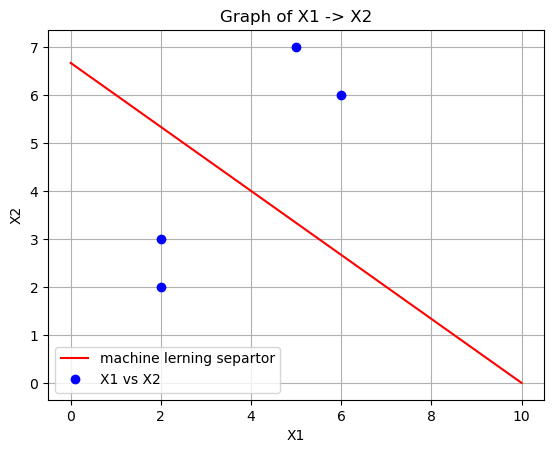

In [3]:
import matplotlib.pyplot as plt

# line separating the the two outcomes
x = np.linspace(0, 10, 100)  # Range of x values from -10 to 10

def simple_gen_alg(x):
    return ((2)/(3)) * -x+((20)/(3))

# Compute y values using the function
y = simple_gen_alg(x)
# Plot RED LIne
plt.plot(x, y, color='red', label='machine lerning separtor')

#Plot dots
plt.plot(df["X1"], df["X2"], marker='o', color='b', linestyle='none', label='X1 vs X2')
plt.xlabel('X1')
plt.ylabel('X2')

plt.title('Graph of X1 -> X2')
plt.legend()
plt.grid(True)
plt.show()

# The objective of the model is find this redline in a multi variable case (database)



In [4]:
####################################################
## 2.0 Data Feature Enginering
####################################################

# 2.1 Importing

# Dataset used : https://www.kaggle.com/datasets/uciml/german-credit


# Download latest version
import kagglehub
path = kagglehub.dataset_download("uciml/german-credit")

print("Path to dataset files:", path)

credit_data = pd.read_csv(path + "/german_credit_data.csv", encoding = 'utf-8') 

credit_data.head()



/usr/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/rodz/.cache/kagglehub/datasets/uciml/german-credit/versions/1


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [5]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [6]:
# 2.2 Geting Bins
new_credit_data = {}

credit_data['Age_CLASS'] = pd.cut(
    credit_data['Age'],
    bins=4
)
credit_data['Credit amount_CLASS'] = pd.cut(
    credit_data["Credit amount"],
    bins=4
)


    
d_list = ["Age_CLASS","Sex","Job","Housing","Saving accounts","Credit amount_CLASS"]

for d in d_list:  
    dummie = pd.get_dummies(credit_data[d], dtype=int,prefix=d).to_dict()
    new_credit_data.update(dummie)
    

# new_credit_data.update(cnt_child.to_dict())

new_df_credit_data = pd.DataFrame(new_credit_data)
new_df_credit_data.head()


    
    



,"Age_CLASS_(18.944, 33.0]","Age_CLASS_(33.0, 47.0]","Age_CLASS_(47.0, 61.0]","Age_CLASS_(61.0, 75.0]",Sex_female,Sex_male,Job_0,Job_1,Job_2,Job_3,...,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,"Credit amount_CLASS_(231.826, 4793.5]","Credit amount_CLASS_(4793.5, 9337.0]","Credit amount_CLASS_(9337.0, 13880.5]","Credit amount_CLASS_(13880.5, 18424.0]"
0,0,0,0,1,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,1,0,0,0,1,0,0,0,1,0,...,1,0,1,0,0,0,0,1,0,0
2,0,0,1,0,0,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
3,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [7]:
####################################################
## 3.0 Refereeing the data
####################################################

# Now lets create our world, with a random [secret] biass for each collumn. This objective of the algorith is to figure out this biass:
import random

# Generate an array of random numbers 
def gen_random_array(len):
    return [random.uniform(-1, 1) for _ in range(len)]
# (the +1 is for the scalar)
random_numbers = gen_random_array(len(new_df_credit_data.columns)+1)

print("Random Numbers: ",random_numbers)
# Calculate the sum of the numbers
total_sum = sum(random_numbers) 

# Normalize the numbers so their sum equals 1
def normlizer(arr,total):
    return [num / total for num in random_numbers]
    
secret_biass = normlizer(random_numbers,total_sum)



#remove the scalar
secret_scalar_biass = secret_biass.pop()

# Verify the sum
print("Normalized secret biass:", secret_biass)
print("Normalized secret sacalar:", secret_scalar_biass)
print("Sum of normalized numbers:", sum(secret_biass)+secret_scalar_biass)



Random Numbers:  [-0.4737135502530303, 0.07192010241126612, 0.4984976582443128, -0.44584997142381755, -0.8646034822319901, 0.8090761605512409, -0.16775320055105714, -0.5405992749057413, -0.25509174884472996, -0.2345444656648037, -0.4438171047554762, -0.9515952555637415, -0.4695308922467887, 0.9130379332357559, -0.28451676789435854, 0.6861106078249064, 0.735212627646695, 0.5889625022024243, -0.8370692729275289, -0.7056502880736277, 0.8605034682814368, -0.5168708207468382]
Normalized secret biass: [0.23359980566792812, -0.035465571837485735, -0.2458214590433152, 0.21985958946292322, 0.4263572475841688, -0.39897535921100513, 0.08272323016297177, 0.2665828019796996, 0.1257920169811306, 0.1156596461522386, 0.21885713289730527, 0.4692550311374388, 0.2315372341056168, -0.4502414669316396, 0.14030221777250926, -0.3383380200312877, -0.3625514339860835, -0.2904318991650016, 0.41277945159478535, 0.3479735170663138, -0.4243354298388806]
Normalized secret sacalar: 0.25488171747966915
Sum of normali

In [8]:
# Add the columns score
new_col = []

QUANTITY_OF_COLS = len(new_df_credit_data.columns)

for index,row in new_df_credit_data.iterrows():
    total_score = secret_scalar_biass
    for i,c in enumerate(row):
        score = c * secret_biass[i]
        total_score = total_score + score
    new_col.append(total_score)
new_df_credit_data['secret_credit_score'] = new_col
new_df_credit_data['credit_score'] = new_df_credit_data['secret_credit_score'].apply(lambda x: 1 if x > 0 else 0)
new_df_credit_data.head()

,"Age_CLASS_(18.944, 33.0]","Age_CLASS_(33.0, 47.0]","Age_CLASS_(47.0, 61.0]","Age_CLASS_(61.0, 75.0]",Sex_female,Sex_male,Job_0,Job_1,Job_2,Job_3,...,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,"Credit amount_CLASS_(231.826, 4793.5]","Credit amount_CLASS_(4793.5, 9337.0]","Credit amount_CLASS_(9337.0, 13880.5]","Credit amount_CLASS_(13880.5, 18424.0]",secret_credit_score,credit_score
0,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0.380381,1
1,1,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1.472424,1
2,0,0,1,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,-0.394751,0
3,0,1,0,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,0,0.127628,1
4,0,0,1,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,0,-0.082728,0


In [9]:
####################################################
## Genethic Algorithm
####################################################
DEBUG = False
TA = (new_df_credit_data['credit_score'] == 1).sum()
print(f"Number of Performers: {TA}")
TI = (new_df_credit_data['credit_score'] == 0).sum()
print(f"Number of Defaulters: {TI}")

# c = cromossomes
datamarts_quantity = 10
cromossomes_per_dm = 100

c_bank = 6

Number of Performers: 626
Number of Defaulters: 374


In [10]:
def generate_random_name():
    prefixes = ["Bel", "Mar", "Sol", "Ari", "Zan", "Kal", "Tor", "Ven"]
    middles = ["da", "re", "lo", "ki", "me", "ne", "ra", "zu"]
    suffixes = ["thon", "dor", "rik", "nis", "tar", "len", "vos", "mir"]
    
    # Construct the name
    prefix = random.choice(prefixes)
    middle = random.choice(middles)
    suffix = random.choice(suffixes)
    return prefix + middle + suffix

In [11]:


class Chromosome:
    def __init__(self,df,genes,debug=False):
        if not isinstance(df, pd.core.frame.DataFrame):
            raise TypeError(f"Expected 'data' to be a pandas DataFrame, but got {type(data).__name__}")

        self.debug = debug
        
        self.name = generate_random_name()
        self.data = df
        self.genes = genes        

        self.rollet_chance = 0
        
        
        self.calculate_gen() 
   
    def calculate_gen(self):
        scalar_biass = self.genes[-1]
        ranged_credit_score = []
        
        for index,row in self.data.iterrows():
            total_score = scalar_biass
            for i,c in enumerate(row):
                score = c * self.genes[i]
                total_score = total_score + score
            ranged_credit_score.append(total_score)

        
        self.ranged_credit_score =  ranged_credit_score
        self.credit_score = [1 if x > 0 else 0 for x in self.ranged_credit_score]
        
        self.NAC = len([x for x in self.credit_score if x == 1])       
        self.NIC = len([x for x in self.credit_score if x == 0])        
        
        self.fitness = self.calculate_fitness(TA,TI)
        if self.debug:
            print(f"Chomosome {self.name} NAC: {self.NAC}")
            print(f"Chomosome {self.name} NIC: {self.NIC}")
            print(f"Chomosome {self.name} Fitness: {self.fitness}")
        

        
    def calculate_fitness(self,TA,TI):
        return (self.NAC * self.NIC) / (TA * TI)
    
    def mutate(self):
        
        mutate_target = random.randint(0, len(self.genes) -1 )
        mutation = random.uniform(-1, 1)        
        self.genes[mutate_target] = mutation

        if self.debug:
            print(f"Mutation: {mutation}")
        
        self.calculate_gen()
        
        return mutation
        


In [12]:
class ChromosomeBank:
    def __init__(self,quantity_of_columns,chromossomes=None,debug=False):
        self.debug = debug
        if not isinstance(quantity_of_columns,int):
            raise TypeError(f"quantity_of_columns must be of type int. Got {quantity_of_columns.__name__}.")
        if chromossomes == None:                
            self.bank_limit = 10
            self._chromosomes = []
        else:
            self._chromosomes = chromossomes
        
        self.children_per_cycle = 3
        self.quantity_of_columns = quantity_of_columns
    @property
    def chromosomes(self):        
        return self._chromosomes
    @chromosomes.setter
    def chromosomes(self,chromosomes):       
        self._chromosomes = self.sort_chromosomes(chromosomes)
        return self._chromosomes
    def add_chromosome(self,chromosome):
        if len(self._chromosomes) >= self.bank_limit :            
            self.survival_of_the_fittest(chromosome)
        else:            
            self._chromosomes.append(chromosome)
            
    def survival_of_the_fittest(self,new_chromosome):
        for i,c in enumerate(self._chromosomes):
            if c.fitness < new_chromosome.fitness:
                if self.debug:
                    print(f"say goodbye to {self._chromosomes[i].name} ({self._chromosomes[i].fitness}) and hello to {new_chromosome.name} ({new_chromosome.fitness})")
                self._chromosomes[i] = new_chromosome
                self._chromosomes = self._chromosomes
                return True
        if self.debug:
            print('chromosome to weak... discarted.')       
        
    def sort_chromosomes(self,chromosomes):
        sorted_objects = sorted(chromosomes,key=lambda c: c.fitness)      
        return sorted_objects
            
    def calculate_rollet(self,debug=False):   
        debug = debug or self.debug
        # Calculate Percentage of the Random Rollet
        total_fitness = 0 
        
        for gen in self.chromosomes:
            total_fitness = total_fitness + gen.fitness
        if debug:
            print(f'Total Fitness: {total_fitness}')
        for index,gen in enumerate(self.chromosomes):
            gen.rollet_chance = (100 * gen.fitness)/total_fitness
            if debug:
                print(f'Chromosome {index} Rollet Chance: {gen.rollet_chance}')
                
    def get_chromosomes_prop_list(self,prop):       
        return [getattr(c, prop) for c in self.chromosomes]
        
    def roll(self, debug=False):
        mother,father = random.choices(self.chromosomes, weights=[item.rollet_chance for item in self.chromosomes], k=2)
        if self.debug:
            print(f'Congratulations to the MOTHER, "{mother.name}" and the FATHER, "{father.name}" !!!')
        self.generateChildren(mother,father)
        
    def generateChildren(self,mother,father):        
        for child in range(self.children_per_cycle):
            crossover_target = random.randint(0, self.quantity_of_columns+1)
            if self.debug:
                print(f"crossover_target: {crossover_target}")
            child_gene = mother.genes[:crossover_target] + father.genes[crossover_target:]   
            
            chromosome_data = new_df_credit_data.sample(n=100).drop(['secret_credit_score','credit_score'],axis=1)
            new_chomosome = Chromosome(chromosome_data,child_gene)
            
            new_chomosome.mutate()    
            self.add_chromosome(new_chomosome)
    def cycle(self,quantity):
        for q in range(quantity):
            self.calculate_rollet()
            self.roll()
            
        

In [13]:
chromosome_bank = ChromosomeBank(QUANTITY_OF_COLS)

for chromosome in range(datamarts_quantity):
    data_mart = new_df_credit_data.sample(n=100).drop(['secret_credit_score','credit_score'],axis=1)
    
    # +1 representing the scalar
    random_genes = gen_random_array(QUANTITY_OF_COLS+1)
    random_genes = normlizer(random_genes,sum(random_genes))  
        
    new_chromosome = Chromosome(data_mart,random_genes)
    
    chromosome_bank.add_chromosome(new_chromosome)      
       


In [14]:

import matplotlib.pyplot as plt
import numpy as np
def make_pie(ar,names):    
    y = np.array(ar)
    mylabels = names
    
    plt.pie(y, labels = mylabels, autopct='%1.0f%%')
    return plt.show() 

First Cycle ---->


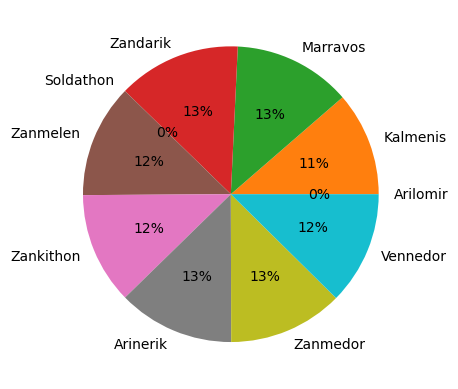

In [15]:
# Rolle the Rollet 
print("First Cycle ---->")
chromosome_bank.cycle(1)
percentages = chromosome_bank.get_chromosomes_prop_list('rollet_chance')
names = chromosome_bank.get_chromosomes_prop_list('name')
make_pie(percentages,names)


100 Cycles ---->


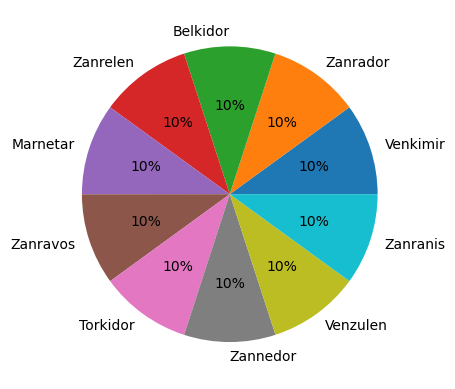

In [16]:
print("100 Cycles ---->")
chromosome_bank.cycle(100)
percentages = chromosome_bank.get_chromosomes_prop_list('rollet_chance')
names = chromosome_bank.get_chromosomes_prop_list('name')
make_pie(percentages,names)

In [17]:
print("Chromosomes Fitness: ")
print([c.fitness for c in chromosome_bank.chromosomes])

Chromosomes Fitness: 
[np.float64(0.010678102202251799), np.float64(0.010678102202251799), np.float64(0.010678102202251799), np.float64(0.010678102202251799), np.float64(0.010678102202251799), np.float64(0.010673830961370898), np.float64(0.010673830961370898), np.float64(0.010673830961370898), np.float64(0.010673830961370898), np.float64(0.010673830961370898)]


In [18]:
print("Chromosomes GENES: ")
for c in chromosome_bank.chromosomes:
    print(f"Genes from {c.name}>>>")
    print(c.genes)


Chromosomes GENES: 
Genes from Venkimir>>>
[-0.18261642853831686, 0.02772517745257677, 0.1921706945783287, -0.1718750274334323, -0.3333043775983652, 0.3118986120967865, -0.06466880743466784, -0.2084008549068493, -0.09833779105270571, 0.07491954625279863, 0.384777954781939, 0.3039640460544445, 0.14998026621132868, -0.2916478437285967, 0.09088198730905668, -0.169591809163272, -0.6312492974132671, -0.5113380362727655, -0.6448933553615257, 0.6126465288529788, -0.7470902681096404, 0.4487479415056943]
Genes from Zanrador>>>
[-0.18261642853831686, 0.02772517745257677, 0.1921706945783287, -0.1718750274334323, -0.3333043775983652, 0.3118986120967865, -0.06466880743466784, -0.2084008549068493, -0.09833779105270571, 0.33429643569348544, 0.384777954781939, 0.3039640460544445, 0.14998026621132868, -0.2916478437285967, 0.6064227089898535, 0.2644954291814385, 0.6687349833501457, -0.5113380362727655, -0.6448933553615257, 0.6976550978302367, -0.7470902681096404, 0.4487479415056943]
Genes from Belkidor>

In [19]:
print(secret_biass)

[0.23359980566792812, -0.035465571837485735, -0.2458214590433152, 0.21985958946292322, 0.4263572475841688, -0.39897535921100513, 0.08272323016297177, 0.2665828019796996, 0.1257920169811306, 0.1156596461522386, 0.21885713289730527, 0.4692550311374388, 0.2315372341056168, -0.4502414669316396, 0.14030221777250926, -0.3383380200312877, -0.3625514339860835, -0.2904318991650016, 0.41277945159478535, 0.3479735170663138, -0.4243354298388806]


In [ ]:
####################################################
## Checking for sucess
####################################################

